Let us start our project by importing libraries required for our task. We'll import pandas for working with dataframes and numpy for working with higher dimensional data. Matplotlib and seaborn for data visualisation.

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

I'm loading our dataset of IRIS flower which contains the measurements of different characteristics of the flower.

In [59]:
data = pd.read_csv('iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Finding the number of rows and column in our dataset. By this, we'll get to know how many examples we have.

In [60]:
data.shape #therefore we have data of 150 flowers.

(150, 6)

For each column in the dataset, let us check the summary of numeric data.

In [61]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


For the species column, I'll check how many unique species we have in our dataset.

In [62]:
data['Species'].unique() #there are 3 unique species in our dataset.

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Let us check how many examples we have of each flower in our dataset.

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64


<AxesSubplot:>

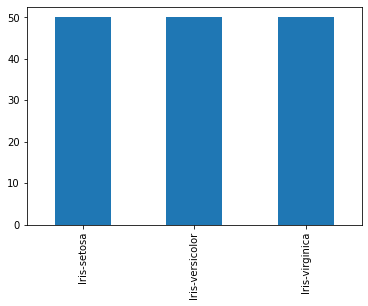

In [63]:
print(data['Species'].value_counts())
data['Species'].value_counts().plot.bar()

In this part, I'll try to compare the measurements for each species of the flower.

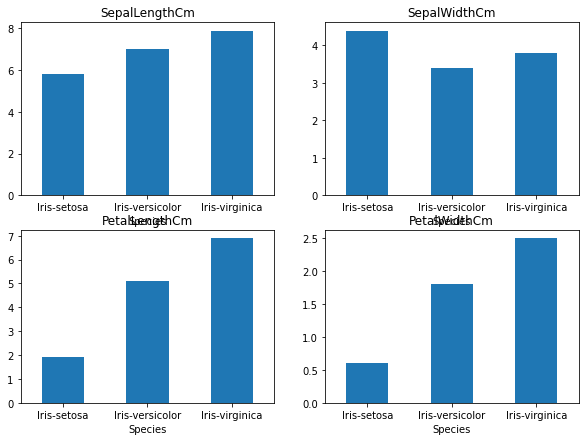

In [64]:
plt.figure(figsize=(10,7))
k=1
for i in data.drop(['Id','Species'], axis=1).columns:
    plt.subplot(2,2,k)
    plt.title(i)
    data.groupby('Species')[i].max().plot.bar()
    plt.xticks(rotation=0)
    k=k+1

In [65]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


##### We have to apply classification algorithm on our dataset to classify flowers in different species based on the measurements provided by our dataset.

First I'll begin by splitting my data into train and test set.

In [66]:
x = data.drop('Species', axis=1)
y = data['Species']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

###### Now, I'll first apply logistic regression to solve our classification.

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)

C:\Users\Divyanshi Kapoor\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [68]:
y_pred = logisticRegr.predict(x_test)

In [69]:
from sklearn.metrics import accuracy_score
print(f"Accuracy of the classifier is: {accuracy_score(y_test, y_pred)}")

Accuracy of the classifier is: 1.0


In [70]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[13  0  0]
 [ 0 16  0]
 [ 0  0  9]]


In [71]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      1.00      1.00        16
 Iris-virginica       1.00      1.00      1.00         9

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38



###### Now, I'll apply K Nearest Neighbours on the dataset

In [72]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
  
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

In [73]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      1.00      1.00        16
 Iris-virginica       1.00      1.00      1.00         9

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38



In [74]:
print(f"Accuracy of the classifier is: {accuracy_score(y_test, y_pred)}")

Accuracy of the classifier is: 1.0
